# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2017-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,10328.500000,10120.250000,10326.750000,10167.450195,936500.0,10167.450195
2020-06-09,10291.150391,10021.450195,10181.150391,10046.650391,754200.0,10046.650391
2020-06-10,10148.750000,10036.849609,10072.599609,10116.150391,632400.0,10116.150391
2020-06-11,10112.049805,9885.049805,10094.099609,9902.000000,715500.0,9902.000000
2020-06-12,9996.049805,9544.349609,9544.950195,9972.900391,0.0,9972.900391


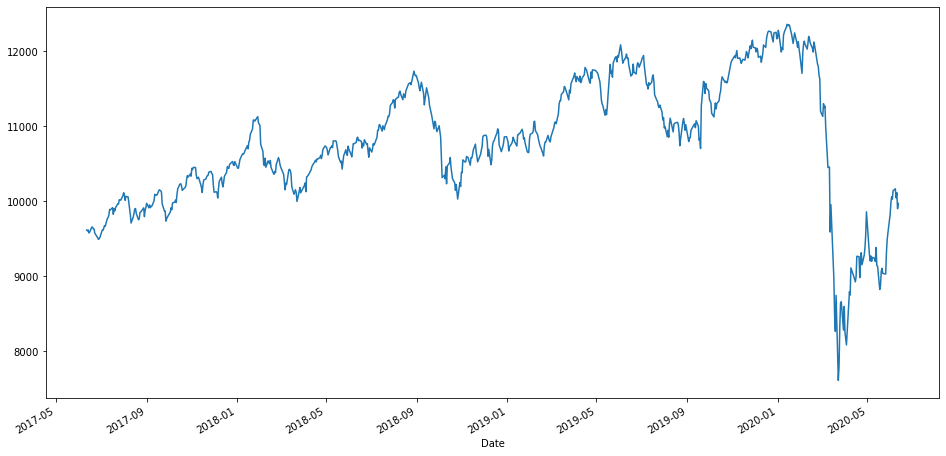

In [4]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [5]:
n=10
X = pd.DataFrame(index=data[['Adj Close']][0:n].index.copy())
for i in range(data.shape[0]-n):
    X[f'{i}'] = np.array(data['Adj Close'][i:n+i].values)
X = X.transpose()
X.index=data.tail(X.shape[0]).index
X = pd.concat([X,data[['Adj Close']].tail(X.shape[0])],axis = 1, sort = False)
X.drop(['Adj Close'],axis=1,inplace=True)

In [6]:
y = data[['Adj Close']].tail(X.shape[0])
y=y.rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [7]:
d = 20
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9213.74  9136.85]
 [ 9135.2   8823.25]
 [ 8856.    8879.1 ]
 [ 8913.99  9066.55]
 [ 9010.29  9106.25]
 [ 9180.29  9039.25]
 [ 9006.52  9029.05]
 [ 9090.82  9314.95]
 [ 9317.57  9490.1 ]
 [ 9493.05  9580.3 ]
 [ 9623.09  9826.15]
 [ 9867.91  9979.1 ]
 [10047.77 10061.55]
 [10074.64 10029.1 ]
 [10080.55 10142.15]
 [10211.69 10167.45]
 [10190.44 10046.65]
 [10085.9  10116.15]
 [10129.14  9902.  ]
 [ 9957.98  9972.9 ]]


regressor.predict([[86.95,90.95,90,88.25]])

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


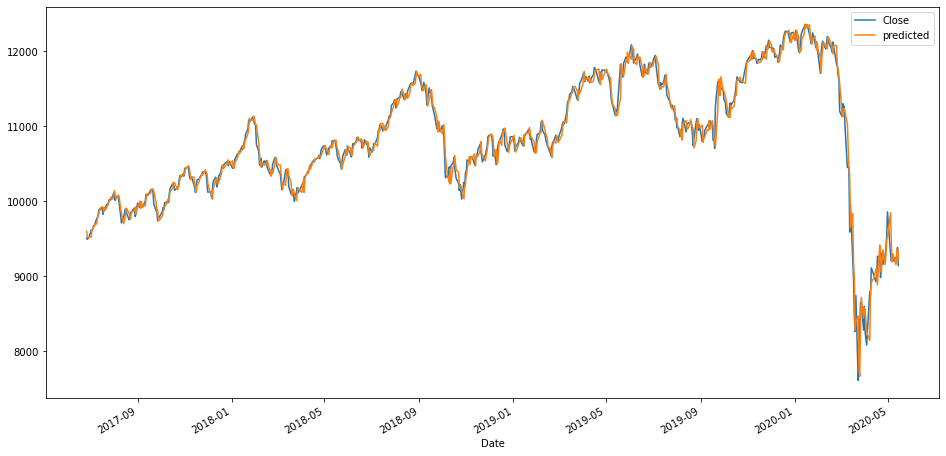

In [10]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


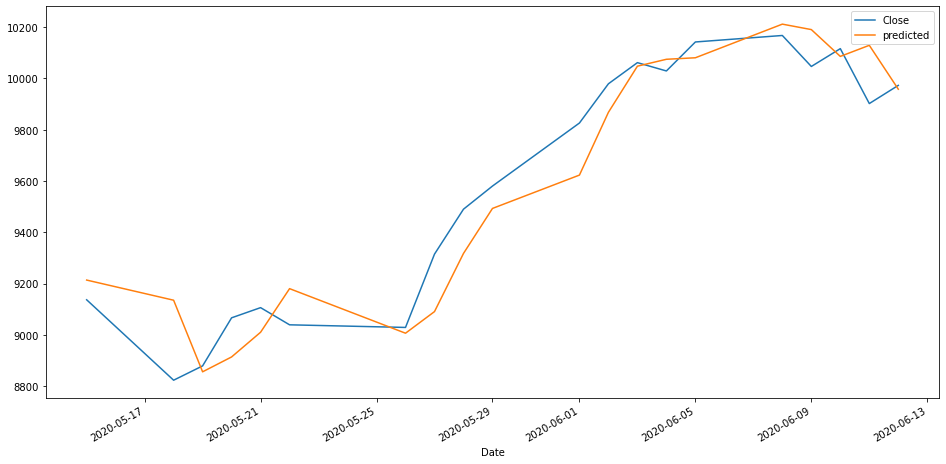

In [11]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [12]:
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

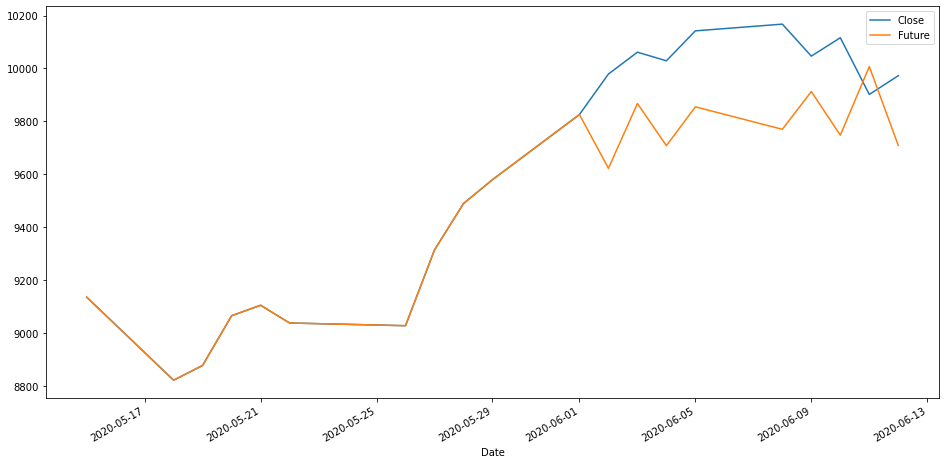

In [13]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-6.145741679162403